# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!git clone https://github.com/RiskModellingResearch/DeepLearning_Winter22.git

Cloning into 'DeepLearning_Winter22'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 32 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [3]:
df = pd.read_csv('DeepLearning_Winter22/week_01/data/data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


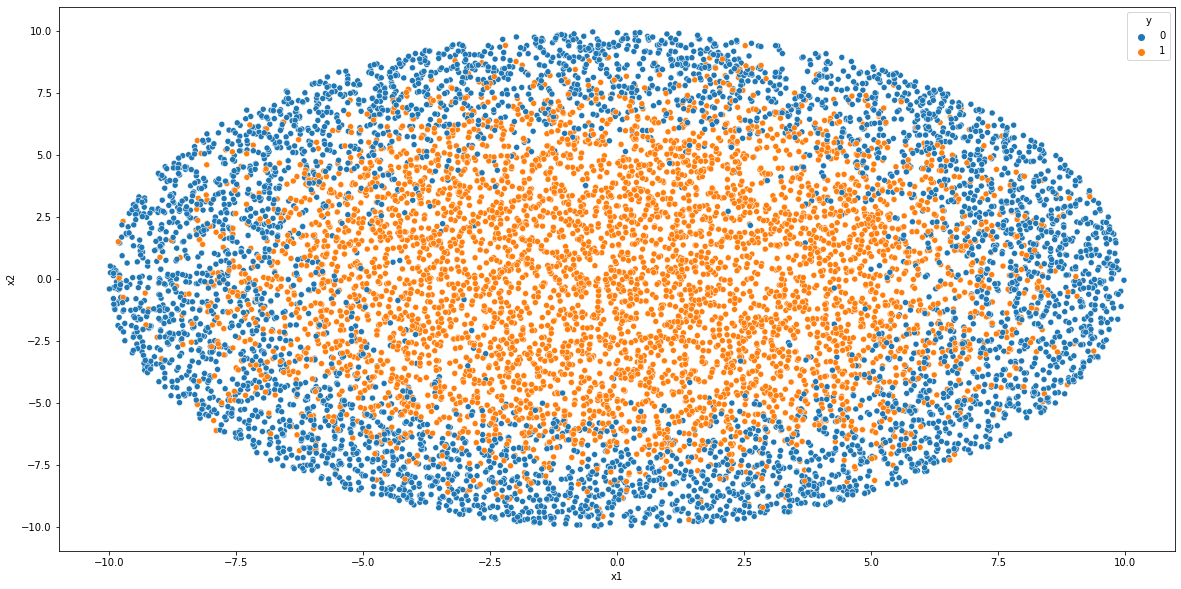

In [4]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33, random_state=42)

Точность нашей модели 0.5963636363636363


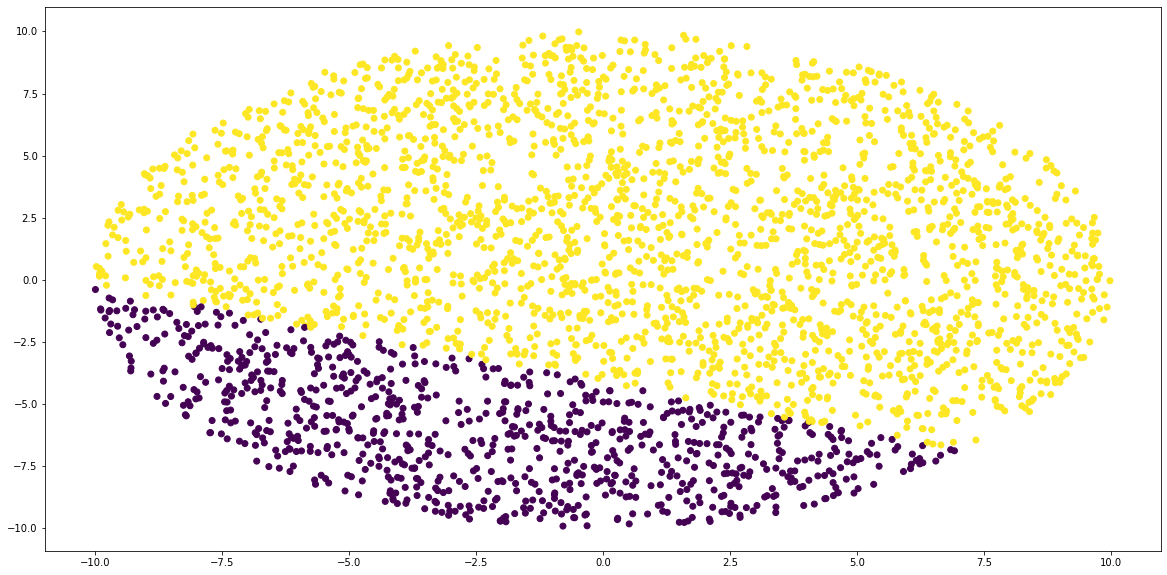

In [6]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
lr = LogisticRegression()
lr.fit(X_train, y_train)

predict_logit =  lr.predict(X_test)
predict_log_proba = lr.predict_log_proba(X_test)

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_logit)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

 Ответ: В данном случае видно, что данные имеют не линейную, а квадратичную зависимость. Поэтому добавлю в качестве новых признаков - квадраты исходных фичей.

Точность нашей модели 0.8381818181818181


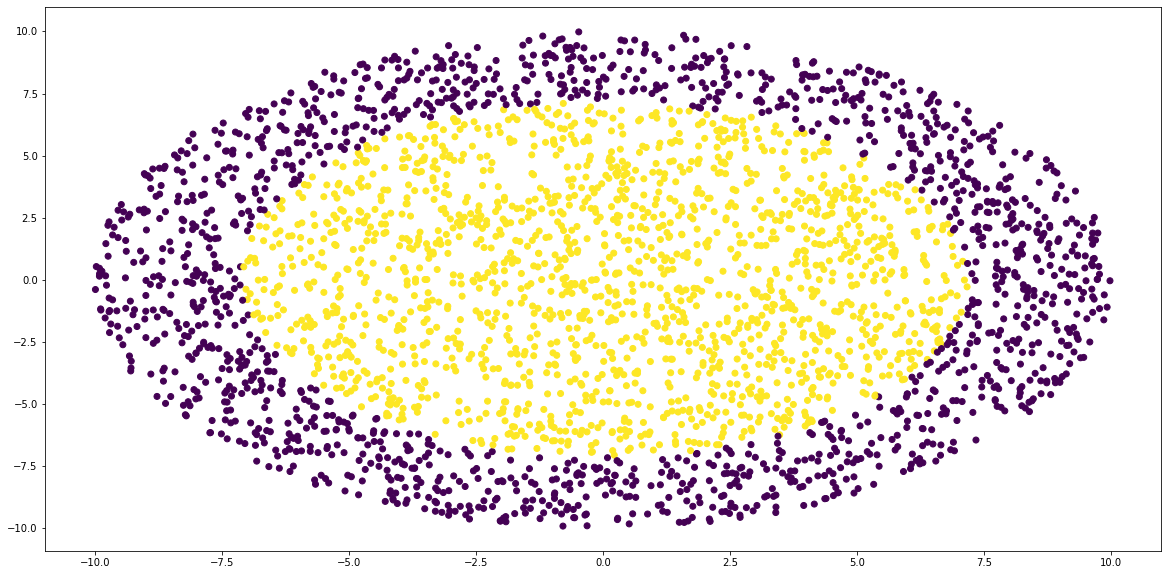

In [7]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df['x1']**2
df_new['new_feature_2'] = df['x2']**2



X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new.drop(['y'], axis=1),
                                                                    df_new['y'], test_size = 0.33, random_state=42)

lr.fit(X_train_new, y_train_new)
predict_logit = lr.predict(X_test_new)
predict_log_proba = lr.predict_log_proba(X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_logit)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Ответ: Деревья легко переобучаются. Для борьбы с переобучением ограничим глубину

Точность нашей модели 0.8209090909090909


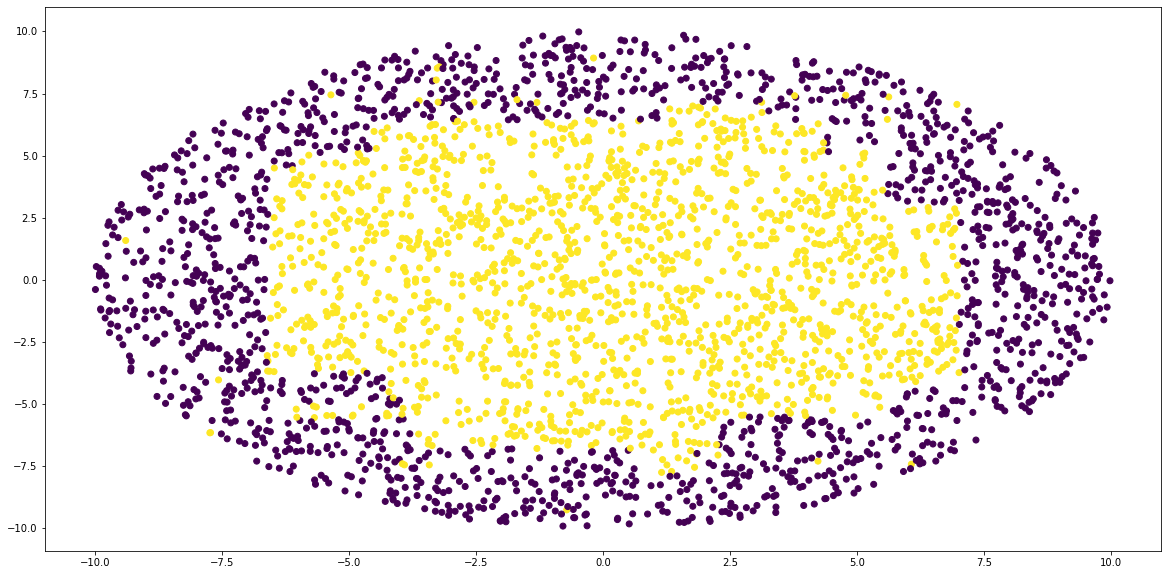

In [8]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, y_train)

predict_tree = dt.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dt.predict_proba(X_test)

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Ответ: В данном случае ансаблирование поможет, так как в данных много выбросов и один алгоритм может переобучиться под них, а в ансамбле данная проблема будет решаться. Как мы видим: действительно, случайный лес четко разграничил классы, а решающее дерево переобучилось под некоторые выбросы.

В целом ансамбль дает хорошие результаты: Если алгоритм достаточно прост и не может хорошо восстановить искомую зависимость, то ансамбль простых алгоритмов справится с этим лучше. Так же ансамбль порой решает проблему переобучения, так мы строим много максимально разнообразных моделей и объединяем их. 

Точность нашей модели 0.8324242424242424


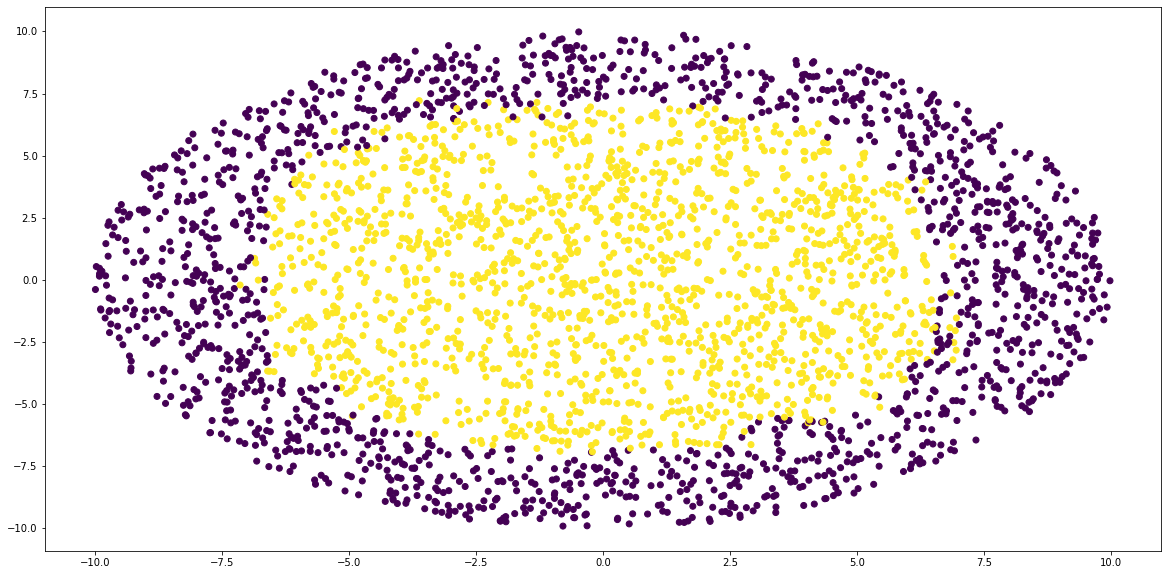

In [9]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код
rf = RandomForestClassifier(max_depth=9)
rf.fit(X_train, y_train)
predict_forest = rf.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = rf.predict_proba(X_test)

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

In [ ]:
# Подгружаем понравившийся фраемворк 
# Собираем сетку
# Учим и радуемся!

In [10]:
pip install torchmetrics

     |████████████████████████████████| 397 kB 4.2 MB/s 


In [11]:
import torch

print(torch.__version__)

import torch.nn as nn # содержит функции для реалзации архитектуры нейронных сетей
import torch.nn.functional as F # содержит различные функции активации и не только
import torch.optim as optim
import torch.utils.data as data_utils

from torchmetrics import Accuracy

1.10.0+cu111


In [12]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)
    return train_loader, test_loader

In [164]:
INPUT_SIZE = 2
HIDDEN_SIZE = 5
OUTPUT_SIZE = 2
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 16

In [165]:
train_loader, test_loader = create_data_loader(X_train.values, y_train.values, X_test.values, y_test.values)

In [158]:
def build_model():
    model = nn.Sequential(  
        # Добавляем в нашу модель первый слой из 2 нейронов
        nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE),
        nn.LeakyReLU(),
        
        # Добавляем ещё слои из 5 нейронов
        nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE),
        nn.LeakyReLU(),
        
        nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE),
        nn.LeakyReLU(),
        # Выходной вектор на количество классов, получаем с помощью такого же линейного приеобразования,
        # как и предыдущие слои, но уже на нужное количество выходных нейронов (т.е. классов)
        nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE),
        nn.Softmax()
    )

    return model

In [173]:
model = build_model()

In [174]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=5, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=5, out_features=2, bias=True)
  (7): Softmax(dim=None)
)


In [175]:
criterion = nn.CrossEntropyLoss()
accuracy = Accuracy()
# softmax = nn.Softmax()

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [176]:
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0
    for epoch in range(EPOCHS):
        running_loss = []
        running_acc = []
        model.train()
        for features, label in train_loader:
            # Reset gradients
            optimizer.zero_grad()

            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)
            loss.backward()
            
            acc = accuracy(output, label).item()

            # Update weights with gradients
            optimizer.step()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : train_loss: %f train_acc: %f' % (epoch, train_loss_values[-1], train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        model.eval()
        for features, label in test_loader:
            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)
            
            acc = accuracy(output, label).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : valid_loss: %f valid_acc: %f' % (epoch, valid_loss_values[-1], valid_accuracy[-1]))
        
    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [177]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


EPOCH 0 : train_loss: 0.679740 train_acc: 0.584477
EPOCH 0 : valid_loss: 0.645274 valid_acc: 0.688104
EPOCH 20 : train_loss: 0.468393 train_acc: 0.837261
EPOCH 20 : valid_loss: 0.468239 valid_acc: 0.841787
EPOCH 40 : train_loss: 0.467666 train_acc: 0.838803
EPOCH 40 : valid_loss: 0.469713 valid_acc: 0.837560
EPOCH 60 : train_loss: 0.467861 train_acc: 0.835272
EPOCH 60 : valid_loss: 0.468024 valid_acc: 0.838768
EPOCH 80 : train_loss: 0.467175 train_acc: 0.836565
EPOCH 80 : valid_loss: 0.468667 valid_acc: 0.839976


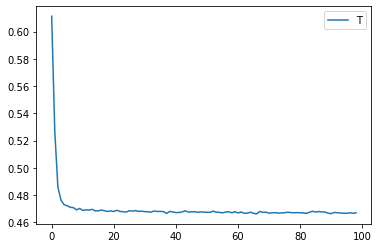

In [178]:
start = 1
plt.plot(train_loss_values[start:])
plt.legend('Train loss')

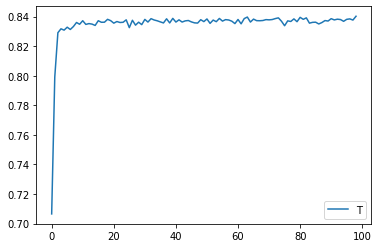

In [179]:
start = 1
plt.plot(train_accuracy_values[start:])
plt.legend('Train accuracy')

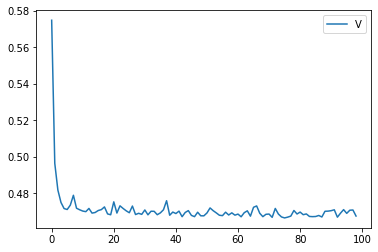

In [180]:
plt.plot(valid_loss_values[start:])
plt.legend('Validation loss')

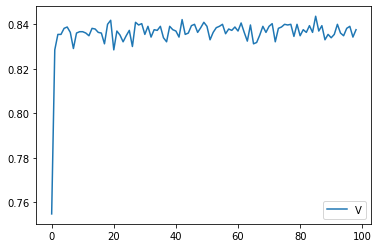

In [181]:
plt.plot(valid_accuracy[start:])
plt.legend('Validation accuracy')

In [196]:
model.eval()
output = model(torch.tensor(X_test.values, dtype=torch.float))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [205]:
softmax_out = output.detach().numpy()
out = np.argmax(softmax_out, axis=1)

Точность нашей модели 0.8378787878787879


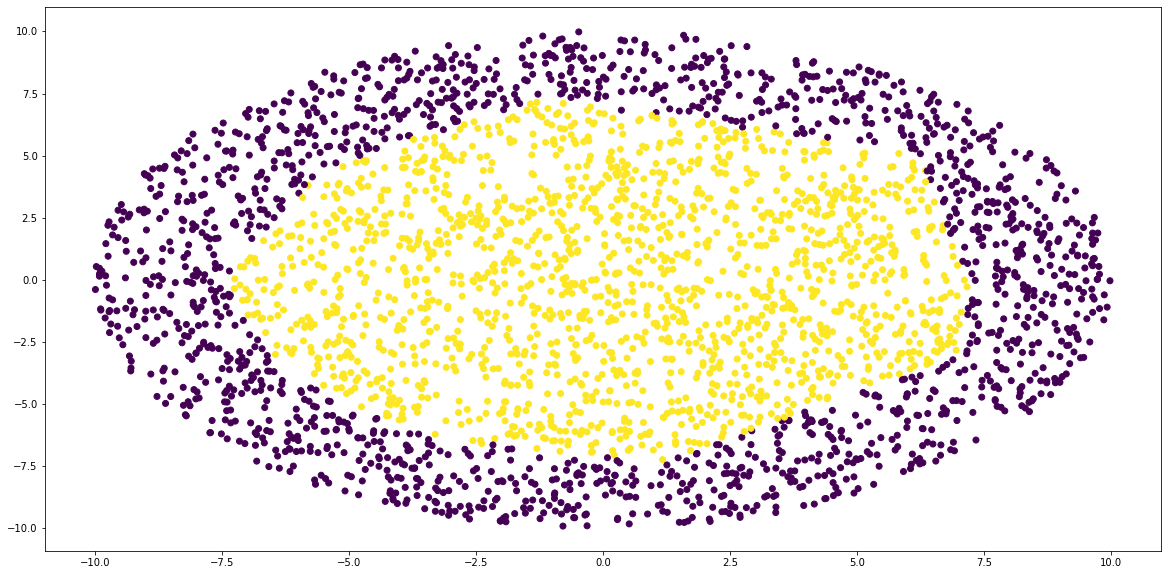

In [206]:
#########################################
# Ваш код

predict_neural = softmax_out
predict_classes = out

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = out)
plt.show()